# FEATURES ANALYSIS

In [13]:
import contextlib
import gc
import joblib
import pickle
import numpy as np
import pandas as pd

from report.tsne import tsne_scatter
# from report.umap import umap_scatter
from models.processors import pca_and_normalization

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt

@contextlib.contextmanager
def clear_memory():
    try:
        yield
    finally:
        gc.collect()

# SILHOUETTE STUDY

In [16]:
DVGG_PATH = "./experiments-1/dvgg/version_0/artifacts/0"

clu = joblib.load(f'{DVGG_PATH}/clustering.dump')

with open(f'{DVGG_PATH}/features.dump', 'rb') as f:
    features = np.load(f)

In [27]:
def silhoette_study(range_n_clusters, features, pca=None, random_state=10, apply_normalization=False, apply_l2_normalization=False, verbose=False):
    for n_clusters in range_n_clusters:
        fig, ax1 = plt.subplots(1, 1, figsize=(9, 9))
    
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(features) + (n_clusters + 1) * 10])

        if pca is None:
            data = pd.DataFrame(features)
        else:
            data = pd.DataFrame(pca_and_normalization(features, apply_normalization=apply_normalization, apply_l2_normalization=apply_l2_normalization, pca=pca))
    
        clusterer = KMeans(init="k-means++", n_clusters=n_clusters, n_init=20, verbose=verbose, random_state=random_state)
        cluster_labels = clusterer.fit_predict(data)
    
        silhouette_avg = silhouette_score(data, cluster_labels)
        sample_silhouette_values = silhouette_samples(data, cluster_labels)
        print(f"For n_clusters = {n_clusters}. The average silhouette_score is : {silhouette_avg}")
        
        y_lower = 10
        for i in range(n_clusters):

            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

For n_clusters = 4. The average silhouette_score is : 0.06403198093175888
For n_clusters = 6. The average silhouette_score is : 0.05967824161052704
For n_clusters = 8. The average silhouette_score is : 0.06196269020438194
For n_clusters = 20. The average silhouette_score is : 0.050780076533555984
For n_clusters = 50. The average silhouette_score is : 0.04740936681628227
For n_clusters = 100. The average silhouette_score is : 0.04202498123049736


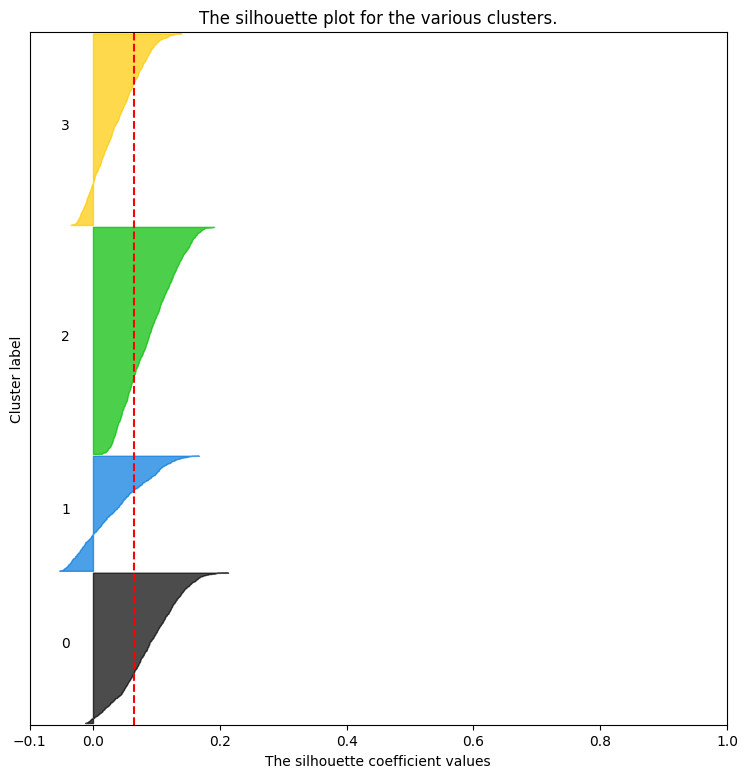

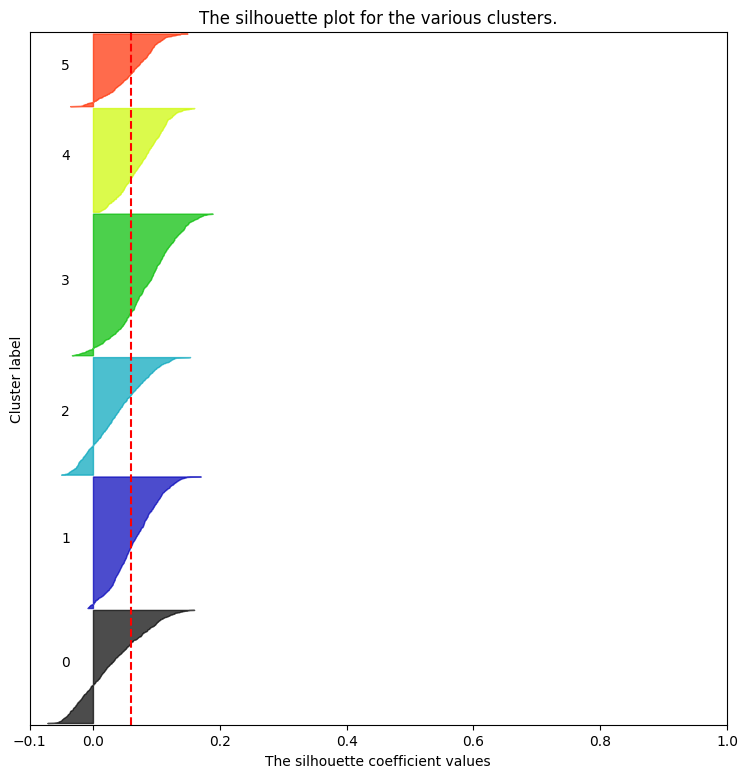

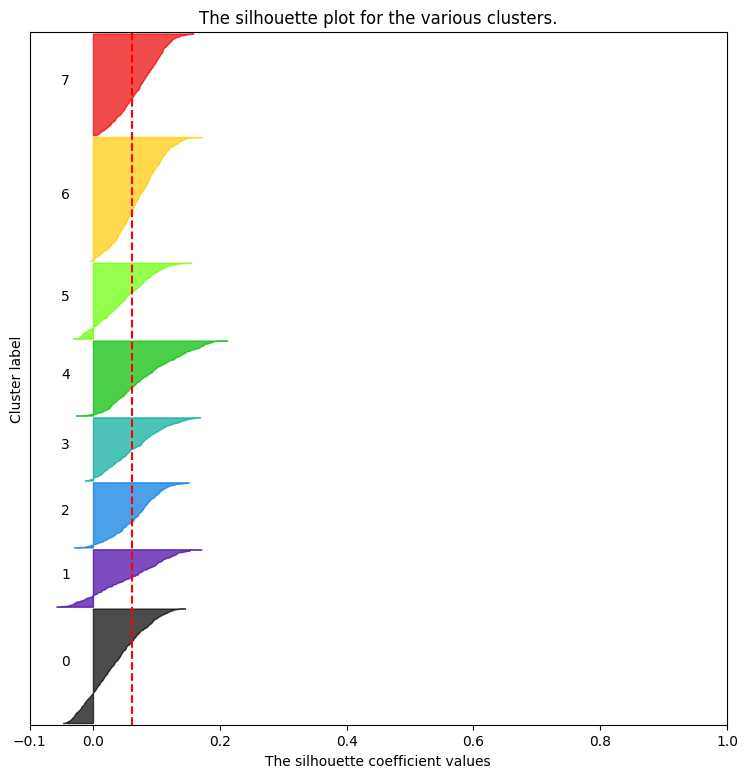

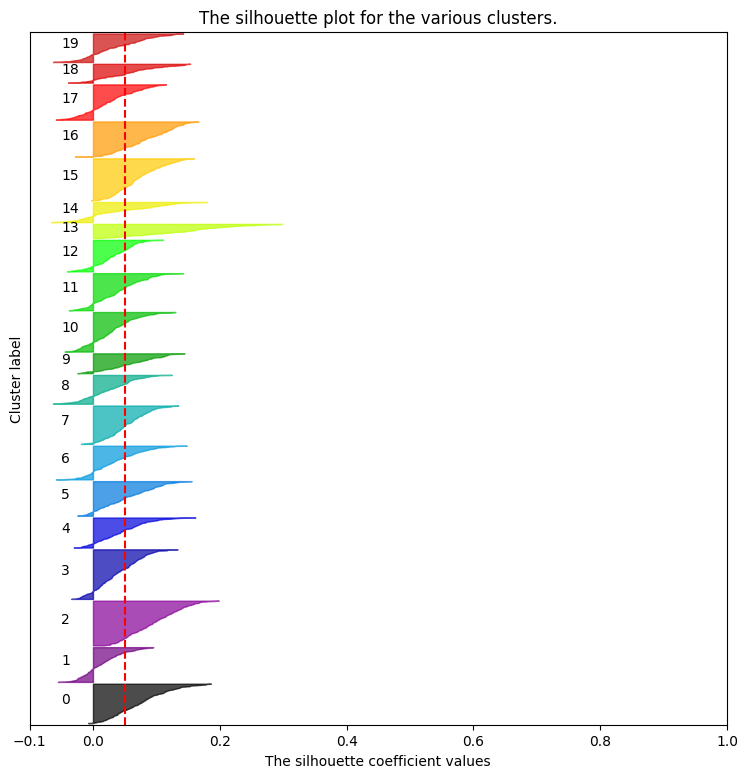

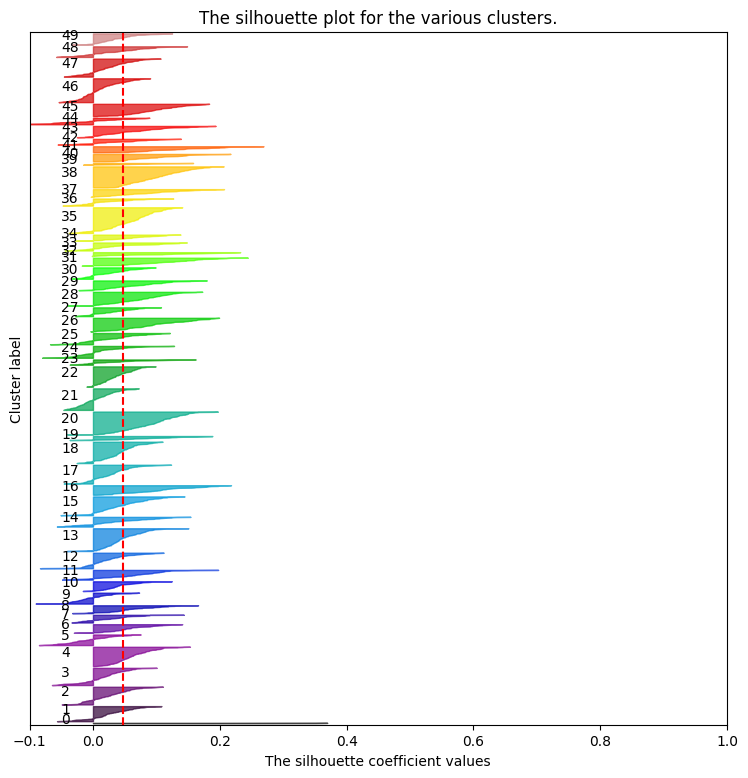

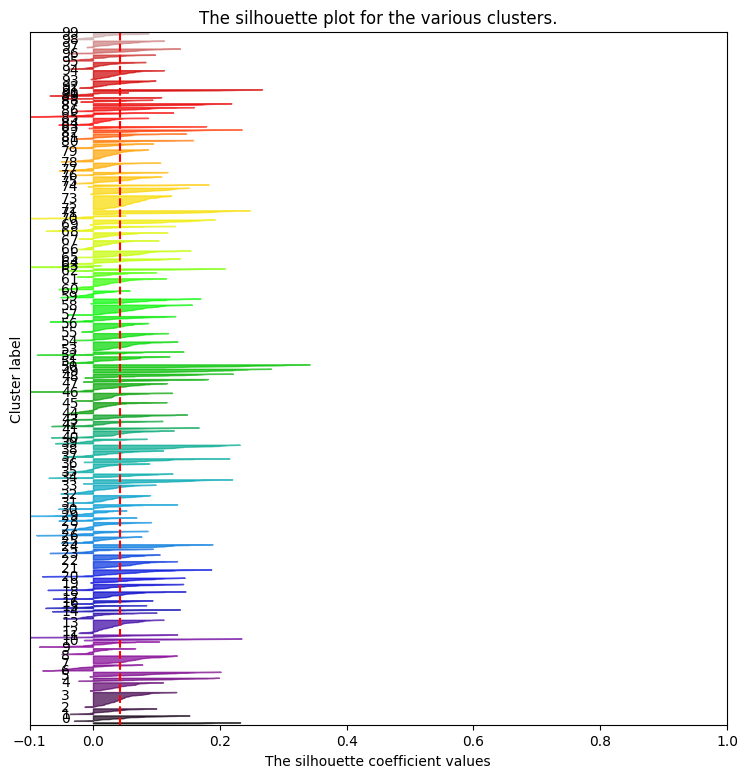

In [23]:
silhoette_study(range_n_clusters=[4, 6, 8, 20, 50, 100], features=features)

For n_clusters = 4. The average silhouette_score is : 0.06915690749883652
For n_clusters = 6. The average silhouette_score is : 0.0651778131723404
For n_clusters = 8. The average silhouette_score is : 0.0680420845746994
For n_clusters = 20. The average silhouette_score is : 0.05341015011072159
For n_clusters = 50. The average silhouette_score is : 0.05125357583165169
For n_clusters = 100. The average silhouette_score is : 0.05056267976760864


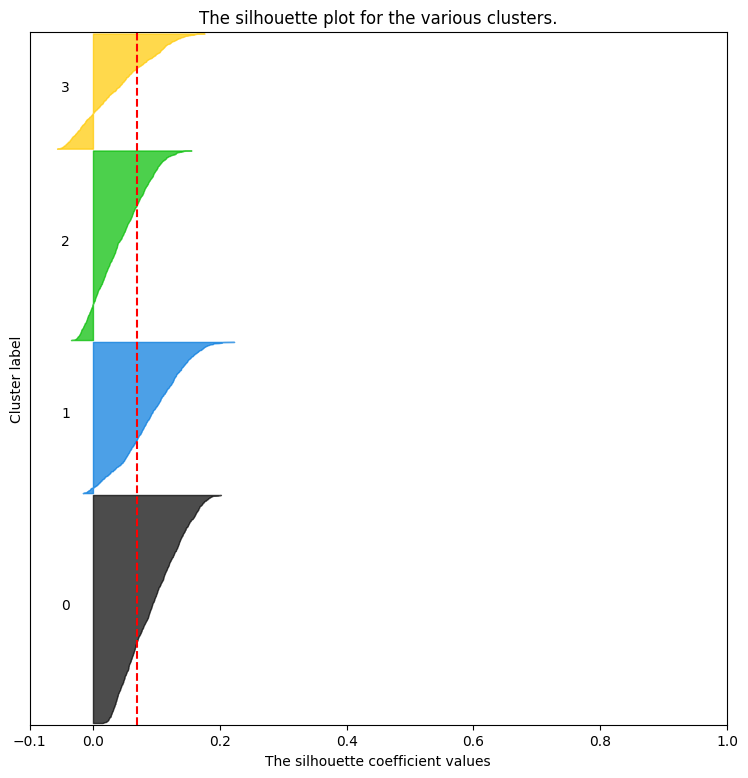

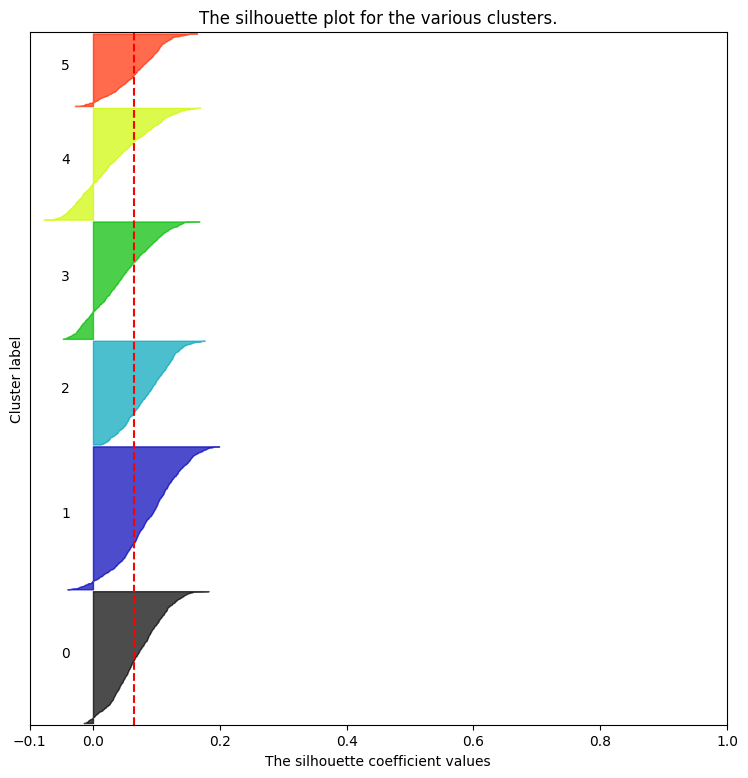

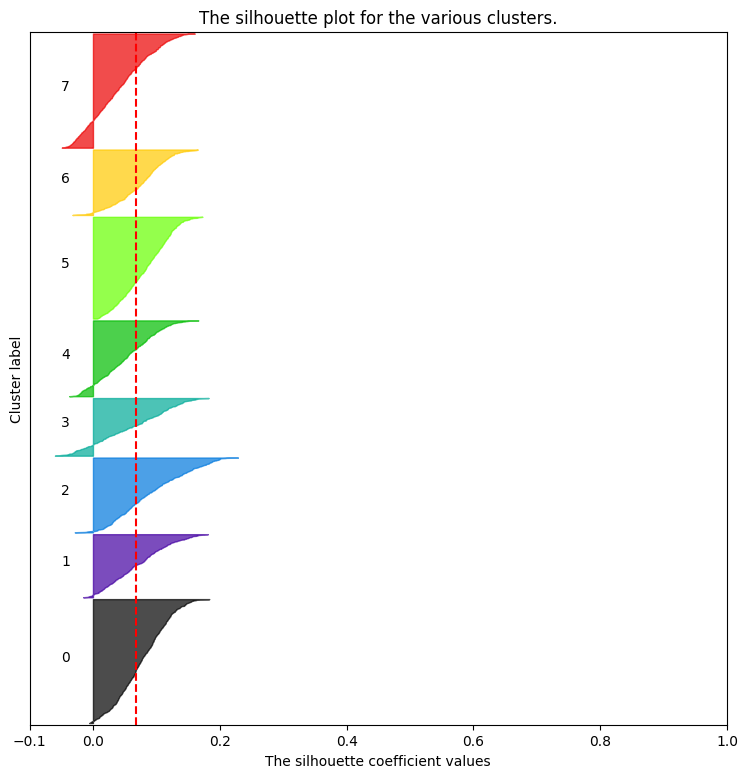

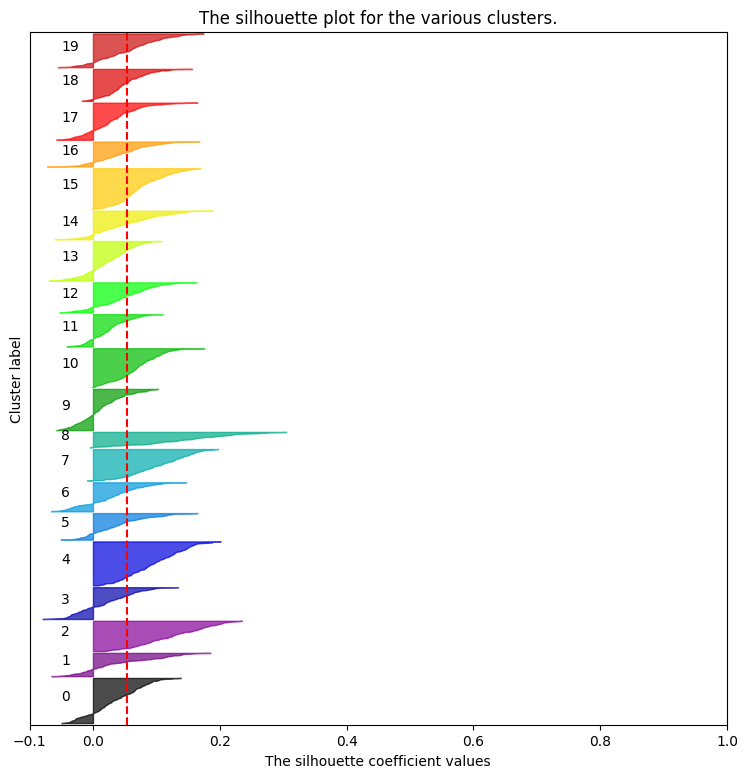

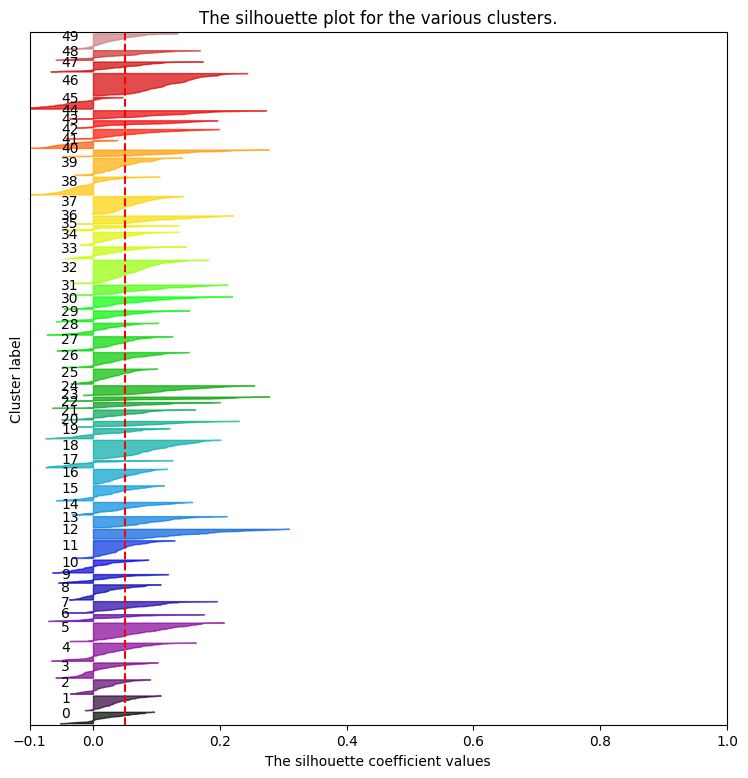

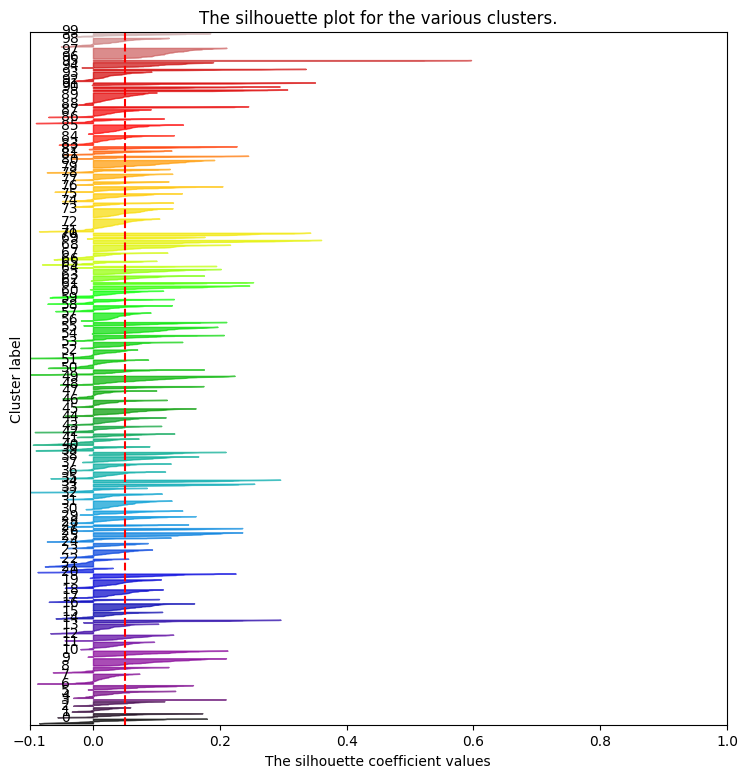

In [30]:
silhoette_study(range_n_clusters=[4, 6, 8, 20, 50, 100], features=features, pca=512)

For n_clusters = 4. The average silhouette_score is : 0.0730624869465828
For n_clusters = 6. The average silhouette_score is : 0.06978939473628998
For n_clusters = 8. The average silhouette_score is : 0.07314817607402802
For n_clusters = 20. The average silhouette_score is : 0.05938255041837692
For n_clusters = 50. The average silhouette_score is : 0.05744098871946335
For n_clusters = 100. The average silhouette_score is : 0.057142119854688644


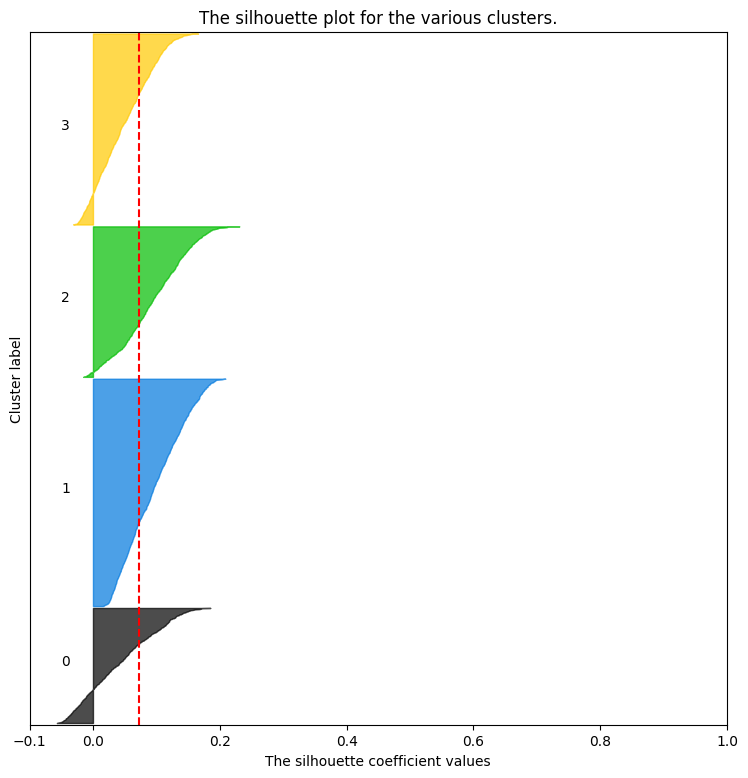

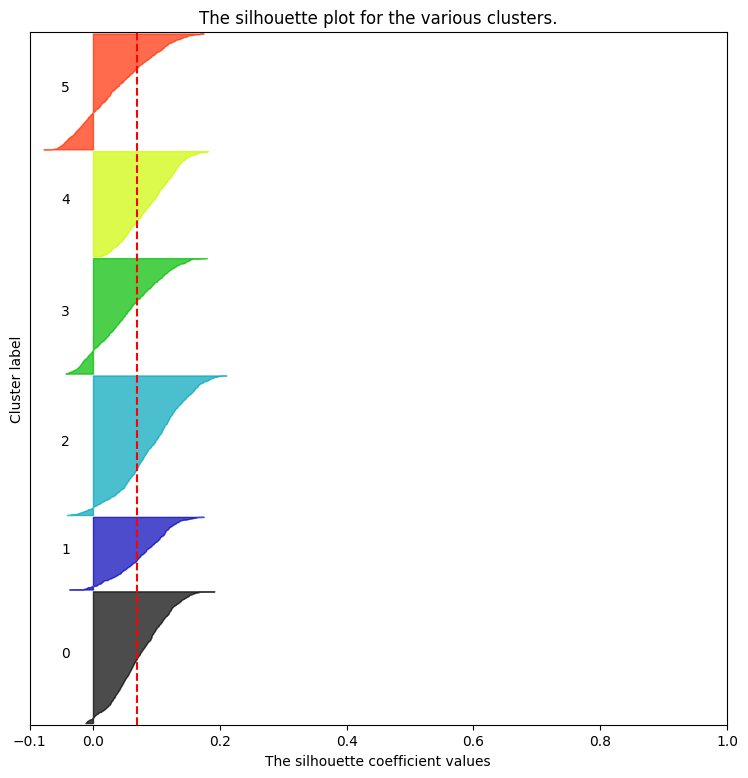

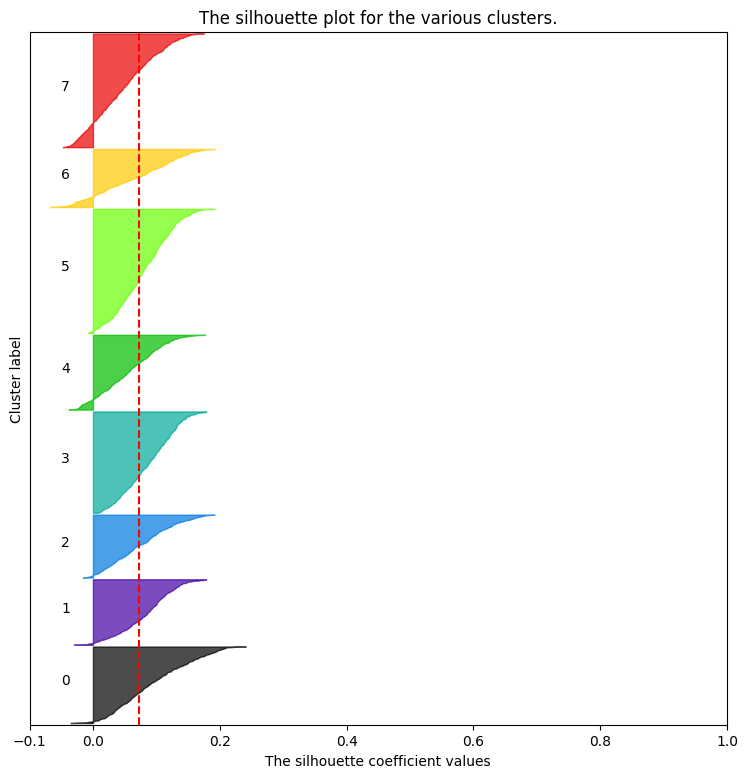

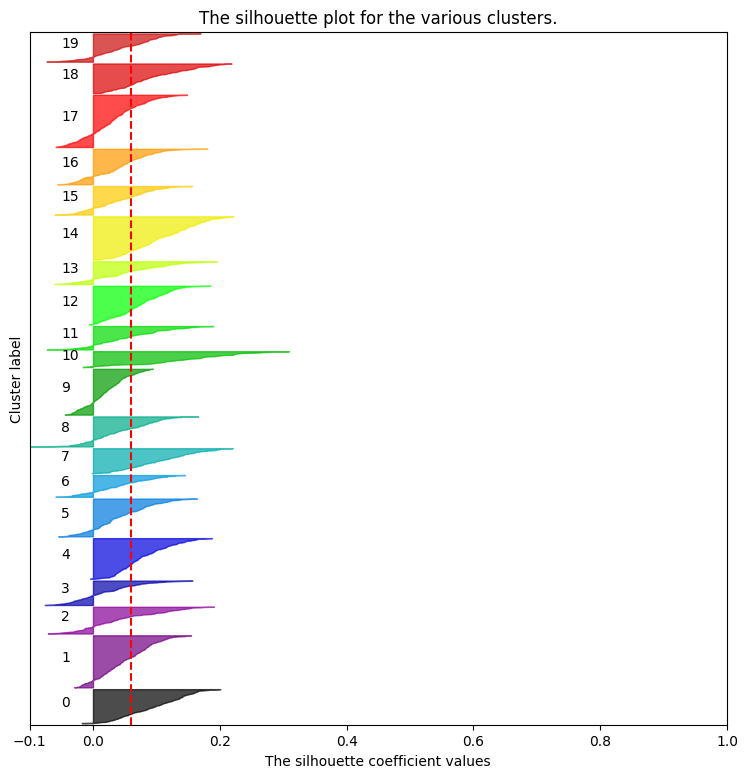

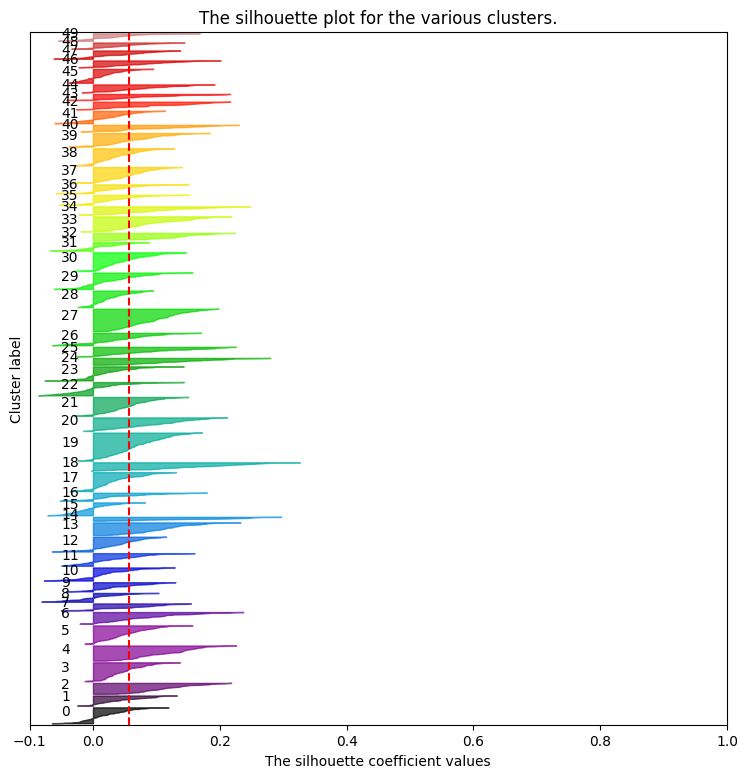

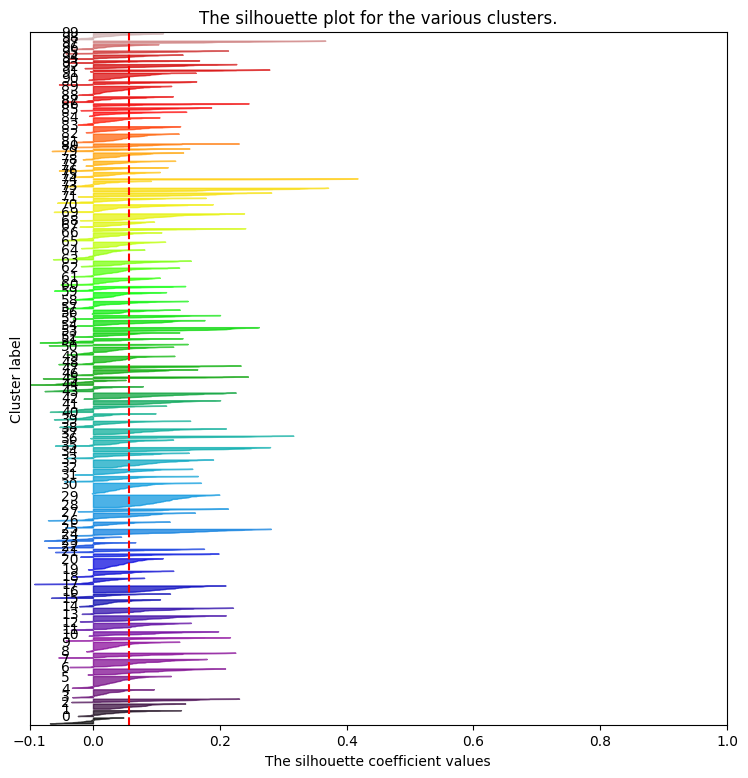

In [24]:
silhoette_study(range_n_clusters=[4, 6, 8, 20, 50, 100], features=features, pca=256)

For n_clusters = 4. The average silhouette_score is : 0.08685377240180969
For n_clusters = 6. The average silhouette_score is : 0.08580151945352554
For n_clusters = 8. The average silhouette_score is : 0.08990760892629623
For n_clusters = 10. The average silhouette_score is : 0.0857820138335228
For n_clusters = 20. The average silhouette_score is : 0.07666004449129105
For n_clusters = 32. The average silhouette_score is : 0.07657240331172943


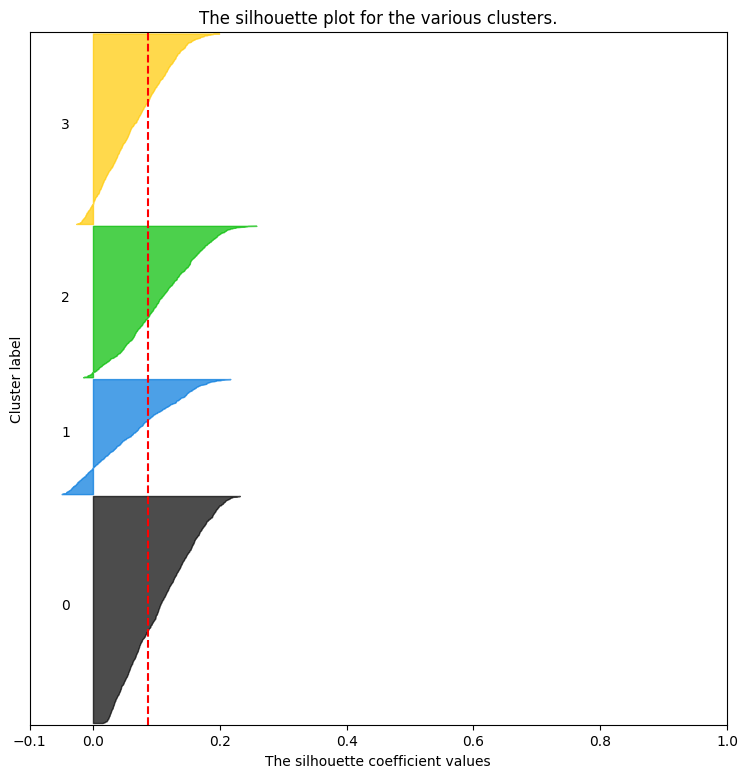

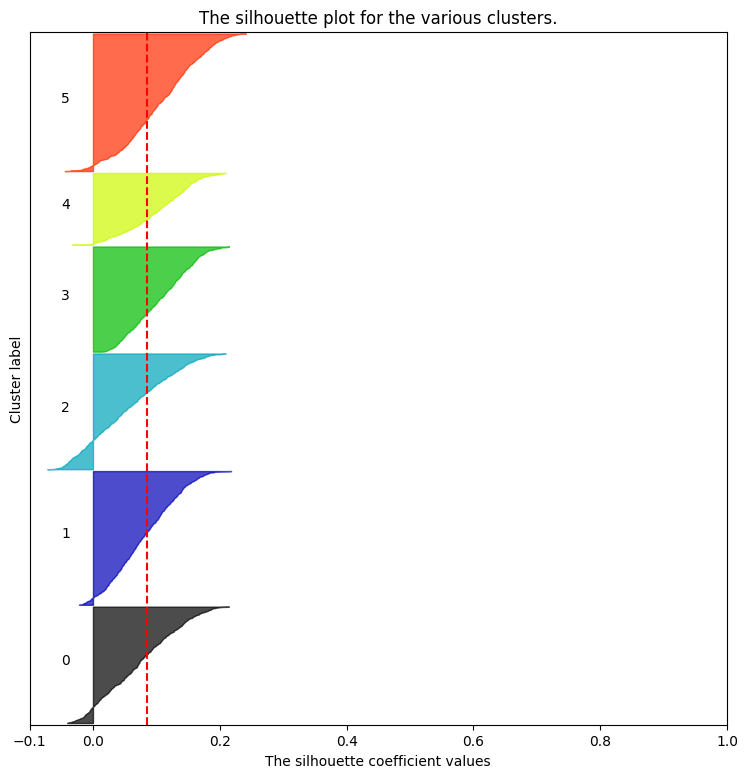

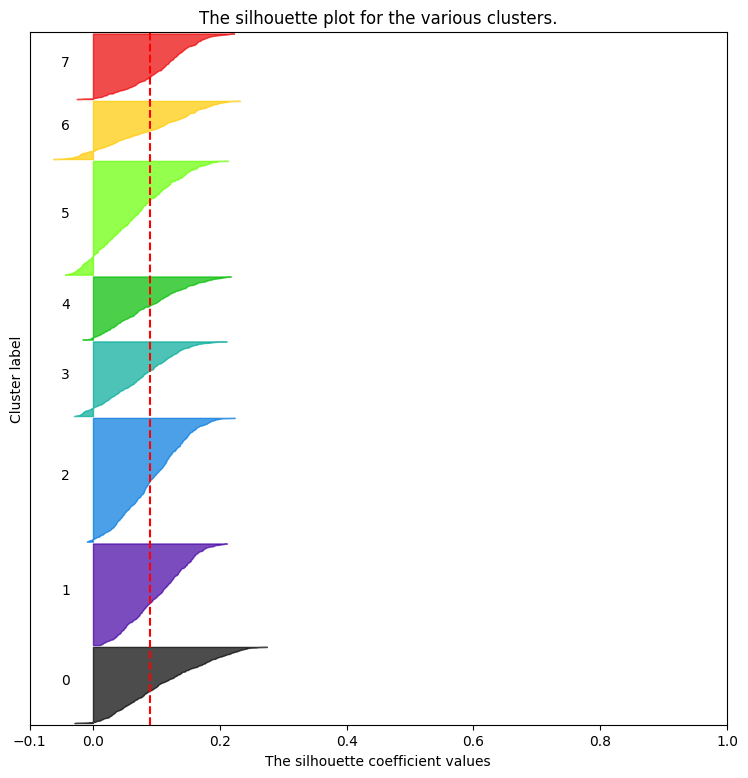

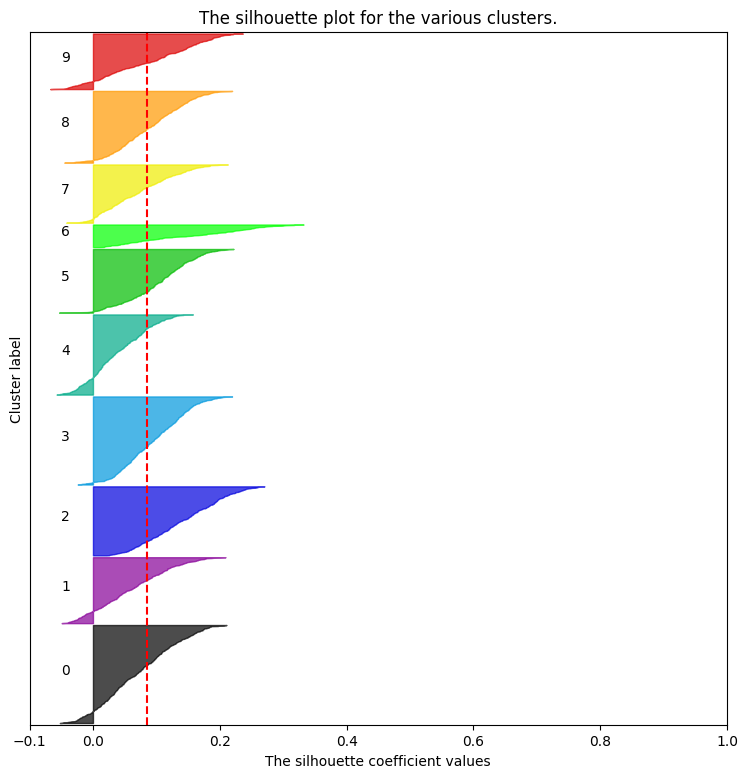

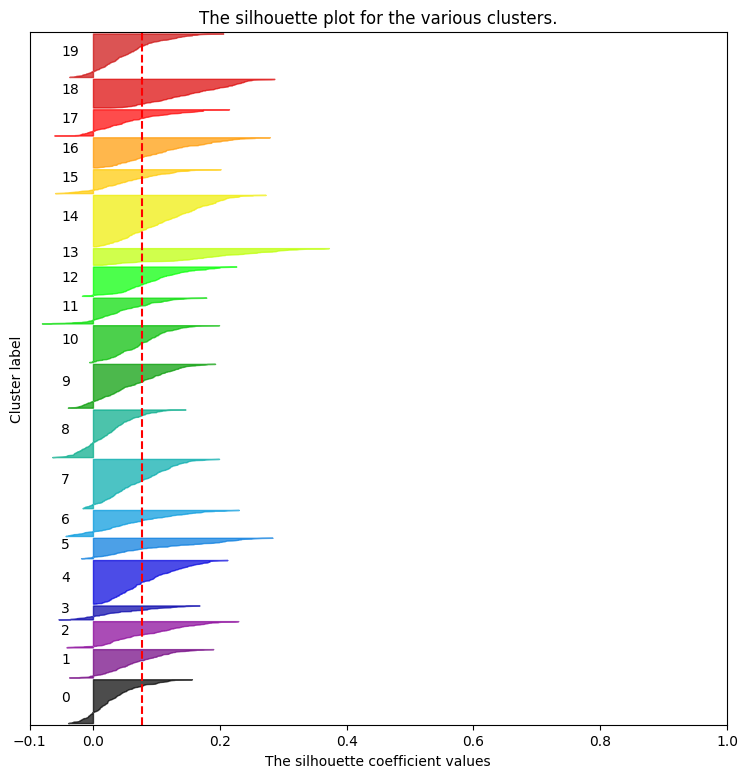

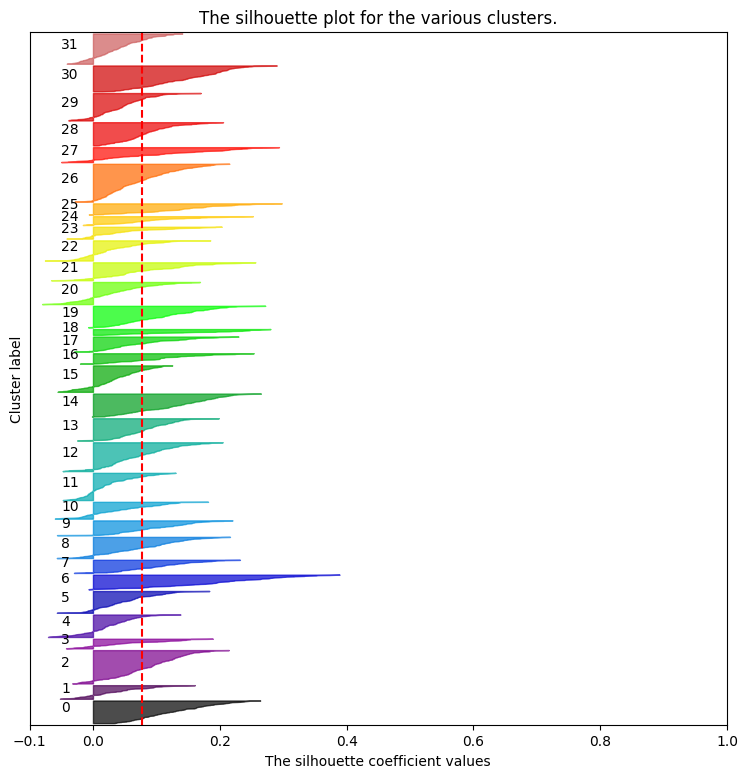

In [26]:
silhoette_study(range_n_clusters=[4, 6, 8, 10, 20, 32], features=features, pca=64)

In [2]:
DVGG_PATH = "./experiments/dvgg/version_0/artifacts/2"

clu = joblib.load(f'{DVGG_PATH}/clustering.dump')

with open(f'{DVGG_PATH}/features.dump', 'rb') as f:
    features = np.load(f)

with open(f'{DVGG_PATH}/features-targets.dump', 'rb') as f:
    feature_targets = np.load(f)

with open(f"./experiments/dvgg/version_0/dvgg-original-targets.dump", "rb") as f:
    original_train_targets = pickle.load(f)

data = pca_and_normalization(features, apply_normalization=False, apply_l2_normalization=False, pca=2)
data = pd.DataFrame(data)
data['targets'] = original_train_targets

## ORIGINAL GROUPS

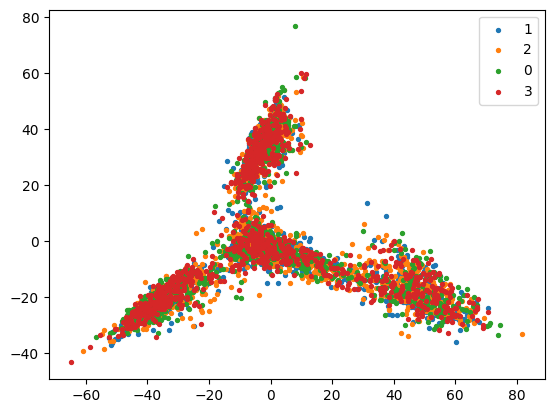

In [22]:
for i in data['targets'].unique():
    plt.scatter(data[data['targets'] == i][0], data[data['targets'] == i][1], marker='o', s=8, label=i)
plt.legend()
plt.show()

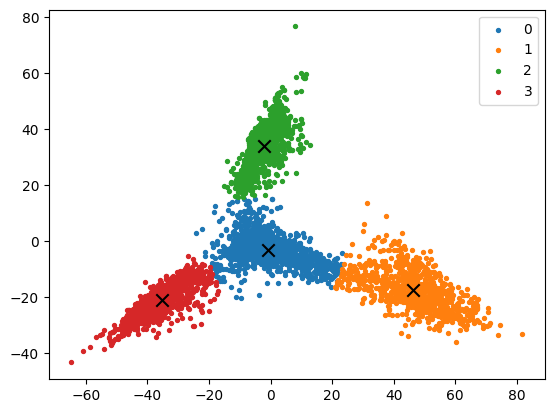

In [23]:
clu = KMeans(init="k-means++", n_clusters=4, n_init=20, random_state=333, verbose=0)
clu.fit(data[[0, 1]])
centroids = clu.cluster_centers_
labels = clu.labels_
u_labels = np.unique(labels)
 
for i in u_labels:
    plt.scatter(data[labels == i][0], data[labels == i][1], marker='o', s=8, label=i)

plt.scatter(centroids[:, 0] , centroids[:, 1] , s=80, marker='x', color='k')

plt.legend()
plt.show()

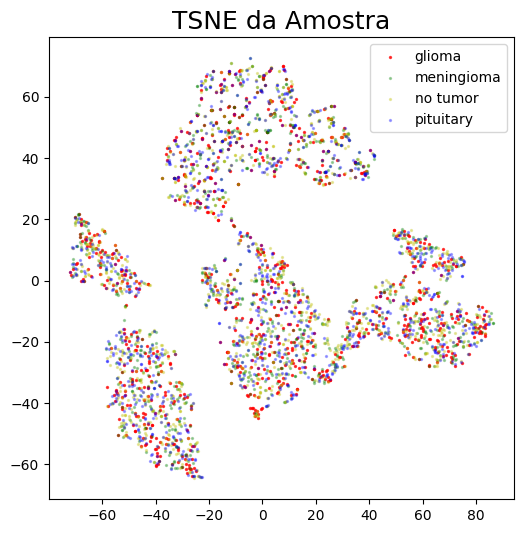

In [28]:
tsne_scatter(features, labels=original_train_targets, dimensions=2)

/Users/arthuralvim/Library/Caches/pypoetry/virtualenvs/xai-clustering-b3gHD5dt-py3.9/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


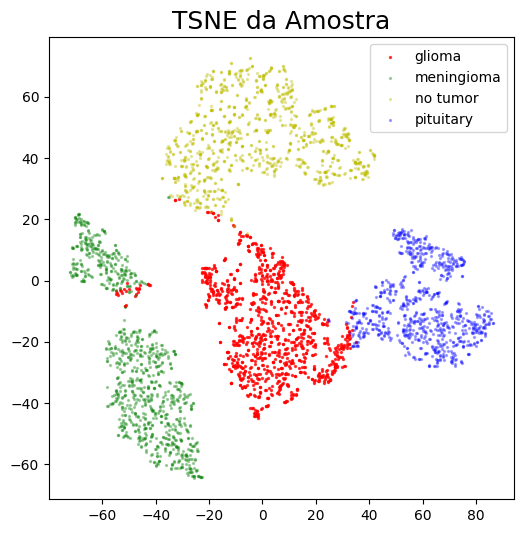

In [10]:
tsne_scatter(features, labels=feature_targets, dimensions=2)

In [ ]:
with clear_memory():
    umap_scatter(features, labels=clu.labels_, dimensions=2)